In [1]:
# Load it from previous run

import os
from dotenv import load_dotenv
import openai

# Load the environment variables from the specified .env file
dotenv_path = '/home/zihan/Desktop/Manufacturing_QA/Experimental_Code/GraphRag/.env'
load_dotenv(dotenv_path)

# Load the OpenAI API key from the environment variable
api_key = os.getenv('GRAPHRAG_API_KEY')
assert api_key is not None, "OpenAI API key not found in environment variables."

openai.api_key = api_key


import qdrant_client
from llama_index.core import SimpleDirectoryReader
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.core import VectorStoreIndex, StorageContext
from llama_index.core.indices import MultiModalVectorStoreIndex

# Create a local Qdrant vector store
client = qdrant_client.QdrantClient(path="qdrant_d_0")

text_store = QdrantVectorStore(
    client=client, collection_name="text_collection_0"
)
image_store = QdrantVectorStore(
    client=client, collection_name="image_collection_0"
)
storage_context = StorageContext.from_defaults(
    vector_store=text_store, image_store=image_store, persist_dir="./storage"
)

from llama_index.core import load_index_from_storage
index = load_index_from_storage(storage_context, image_store=image_store)

**Node ID:** f26e92a1-b5b5-45ac-9f85-0ee978470b5e<br>**Similarity:** 0.8615861857494782<br>**Text:** In addition, the joint must be designed to exploit the particular  strengths of adhesive bonding and avoid its limitations.  

# 30.3.1  JOINT DESIGN  

Adhesive joints are not generally as strong as those by welding, brazing, or solder- ing. Accordingly, consideration must be given to the design of joints that are adhe- sively bonded. The following design principles are applicable: (1) Joint contact area  should be maximized. (2) Adhesive joints are strongest in shear and tension as in  Figure 30.10(a) and (b), and joints should be designed so that the applied stresses  are of these types. (3) Adhesive bonded joints are weakest in cleavage or peeling as  in Figure 30.10(c) and (d), and adhesive bonded joints should be designed to avoid  these types of stresses.  

Typical joint designs for adhesive bonding that illustrate these design principles  are presented in Figure 30.11. Some joint designs combine adhesive bonding with  other joining methods to increase strength and/or provid...<br>

----------------------------------------


**Node ID:** a7cd9b74-1a9f-4ae2-83e5-b46eab16bc06<br>**Similarity:** 0.8153035848910439<br>**Text:** Bitumen, an asphalt adhesive, was used in an- cient times as a cement and mortar for construction  in Asia Minor. The Romans used pine wood tar and  beeswax to caulk their ships. Glues derived from ﬁ  sh,  stag horns, and cheese were used in the early centu- ries after Christ for assembling components of wood. In more modern times, adhesives have become  an important joining process. Plywood, which relies  on the use of adhesives to bond multiple layers of  wood, was developed around 1900. Phenol formal- dehyde was the ﬁ  rst synthetic adhesive developed,  around 1910, and its primary use was in bonding of  wood products such as plywood. During World War II,  phenolic resins were developed for adhesive bonding  of certain aircraft components. In the 1950s, epoxies  were ﬁ  rst formulated. And since the 1950s a variety  of additional adhesives have been developed, includ- ing anaerobics, various new polymers, and second- generation acrylics.  

Adhesive bonding  is a joining process ...<br>

----------------------------------------


**Node ID:** ddd6a88f-013a-4a89-abd2-3add3b008c4a<br>**Similarity:** 0.802171387347366<br>**Text:** [](images/4fa9287e7e474f4387d790a053742a087536a2b5fe6d46af83a3ed15bed0f89e.jpg)  
FIGURE 3.10  Bending of a rectangular cross section results in both tensile and compressive stresses in the  material: (1) initial loading; (2) highly stressed and strained specimen; and (3) bent part.  

load. These materials do not respond well to traditional tensile testing because of  problems in preparing the test specimens and possible misalignment of the press  jaws that hold the specimen. The  bending test  (also known as the  ﬂ  exure test ) is  used to test the strength of these materials, using a setup illustrated in the ﬁ  rst  diagram in Figure 3.10. In this procedure, a specimen of rectangular cross section  is positioned between two supports, and a load is applied at its center. In this con- ﬁ  guration, the test is called a three-point bending test. A four-point conﬁ  guration  is also sometimes used. These brittle materials do not ﬂ  ex to the exaggerated ex- tent shown in Figure 3.10;...<br>

----------------------------------------


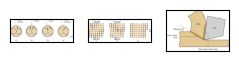

In [2]:
"""Single Query test"""


from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import os

def plot_images(image_paths):
    images_shown = 0
    for img_path in image_paths:
        if os.path.isfile(img_path):
            image = Image.open(img_path).convert("RGB")

            plt.subplot(8, 8, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])
            
            images_shown += 1
            if images_shown >= 64:
                break

    plt.tight_layout()
    plt.show()


from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode
test_query = "Adhesively bonded joints are strongest under which type of stresses (pick two best answers): (a) cleavage, (b) peeling, (c) shear, and (d) tension."
# generate  retrieval results
retriever = index.as_retriever(similarity_top_k=3, image_similarity_top_k=3)
retrieval_results = retriever.retrieve(test_query)

retrieved_image = []
for res_node in retrieval_results:
    if isinstance(res_node.node, ImageNode):
        retrieved_image.append(res_node.node.metadata["file_path"])
    else:
        display_source_node(res_node, source_length=1000)
        print("----"*10)
plot_images(retrieved_image)

In [3]:
res_node.get_score()


0.326958810879014

In [4]:
scores = []
for i in retrieval_results:
    scores.append(i.get_score())

scores

[0.8615861857494782,
 0.8153035848910439,
 0.802171387347366,
 0.33605779729477514,
 0.32819165507382064,
 0.326958810879014]

In [9]:
"""Put everything together"""
import re
import os
import base64
from openai import OpenAI
from llama_index.core.schema import ImageNode
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

def plot_images(image_paths):
    images_shown = 0
    for img_path in image_paths:
        if os.path.isfile(img_path):
            image = Image.open(img_path).convert("RGB")

            plt.subplot(8, 8, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])
            
            images_shown += 1
            if images_shown >= 64:
                break

    plt.tight_layout()
    plt.show()


def extract_image_links(text):
    pattern = r'!\[\]\((.*?)\)'
    return re.findall(pattern, text)


# Step 2: Modify paths to correct image paths
def full_image_paths(image_links, base_folder)-> (list[str]):
    text_extracted_images = []
    for img_path in image_links:
        # Remove 'images/' from the beginning of the path if it exists
        if img_path.startswith('images/'):
            img_path = img_path[len('images/'):]  # Remove 'images/' from the path
            full_path = os.path.join(base_folder, img_path)
        elif image_links == os.path.basename(img_path):
            full_path = os.path.join(base_folder, img_path)
        elif image_links != os.path.basename(img_path):
            img_path = os.path.basename(img_path)
            full_path = os.path.join(base_folder, img_path)
        else:
            print(f"Image pattern some error check if image fit situation above for debug: {img_path}")
        

        if not os.path.isfile(full_path):
            print(f"File not found: {full_path}")
        text_extracted_images.append(full_path)
    return text_extracted_images


def ReciprocalRank(retrieved_images, correct_images):
    for i, img in enumerate(retrieved_images):
        if img in correct_images:
            return float(1/(i+1))
    # If no image is correct,
    return float(0)

def Hit(retrieved_images, correct_images):
    for img in retrieved_images:
        if img in correct_images:
            return bool(1)
    # If no image is correct, return 0
    return bool(0)

def MaxMinNorm(scores):
    max_score = max(scores)
    min_score = min(scores)
    normalized_scores = [(score - min_score) / (max_score - min_score) for score in scores]
    return normalized_scores

def Evaluation(question, answer, image_folder, top_k = 3, image_top_k=3, show_images=False, 
               show_context=False, verbose = True) -> (list[str], list[str], list[str], float, float, float, bool, bool, bool): 
    retriever = index.as_retriever(similarity_top_k=top_k, image_similarity_top_k=image_top_k)
    retrieval_results = retriever.retrieve(question)

    images_link = []
    retrieved_images = []
    retrieved_images_scores = []
    text_scores = []
    context_str = ""
    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_images.append(res_node.node.metadata["file_path"])
            retrieved_images_scores.append(res_node.get_score())
        else:
            text = res_node.node.text
            text_scores.append(res_node.get_score())
            context_str += text
            images_link += extract_image_links(text)

    normalized_retrieved_images_scores = MaxMinNorm(retrieved_images_scores)
    if verbose: print('retrieved_images_scores', retrieved_images_scores)
    if verbose: print('normalized_retrieved_images_scores', normalized_retrieved_images_scores)
    normalized_text_scores = MaxMinNorm(text_scores)
    if verbose: print('text_scores', text_scores) 
    if verbose: print('normalized_text_scores', normalized_text_scores)


    # Text extracted images
    images_and_text_scores = list(zip(images_link, normalized_text_scores))
    sorted_images_and_text_scores = sorted(images_and_text_scores, key=lambda x: x[1], reverse=True)
    sorted_images_link = [img for img, score in sorted_images_and_text_scores]
    sorted_text_scores = [score for img, score in sorted_images_and_text_scores]
    text_extracted_images = full_image_paths(sorted_images_link, image_folder)
    text_extracted_images_basenames = [os.path.basename(image) for image in text_extracted_images]
    if verbose: print('text_extracted_images_basenames:',text_extracted_images_basenames)
    if verbose: print('sorted scores:',sorted_text_scores)

    # Retrieved images
    retrieved_images_and_scores = list(zip(retrieved_images, normalized_retrieved_images_scores))
    sorted_retrieved_images_and_scores = sorted(retrieved_images_and_scores, key=lambda x: x[1], reverse=True)
    sorted_retrieved_images = [img for img, score in sorted_retrieved_images_and_scores]
    sorted_retrieved_images_scores = [score for img, score in sorted_retrieved_images_and_scores]
    retrieved_images_basenames = [os.path.basename(image) for image in sorted_retrieved_images]
    if verbose: print('retrieved_images_basenames:',retrieved_images_basenames)
    if verbose: print('sorted retrieved scores:',sorted_retrieved_images_scores)



    # All images
    combined_images_and_scores = list(zip(text_extracted_images_basenames, sorted_text_scores)) + list(zip(retrieved_images_basenames, sorted_retrieved_images_scores))
    sorted_combined_images_and_scores = sorted(combined_images_and_scores, key=lambda x: x[1], reverse=True)
    final_sorted_images_basename = [img for img, score in sorted_combined_images_and_scores]
    final_sorted_scores = [score for img, score in sorted_combined_images_and_scores]

    if verbose: print('final_sorted_images_basename:',final_sorted_images_basename)
    if verbose: print('final sorted scores:',final_sorted_scores)
    
    if verbose: print('Answer:',answer)

    rr_retrieved = ReciprocalRank(retrieved_images_basenames, answer)
    rr_text = ReciprocalRank(text_extracted_images_basenames, answer)
    rr_all = ReciprocalRank(final_sorted_images_basename, answer)

    hit_retrieved = Hit(retrieved_images_basenames, answer)
    hit_text = Hit(text_extracted_images_basenames, answer)
    hit_all = Hit(final_sorted_images_basename, answer)


    if show_images:
        if verbose: print("final_sorted_images_basename",
              final_sorted_images_basename,
              "\nimage_folder",
              image_folder)
        all_images = full_image_paths(final_sorted_images_basename, image_folder)

        plot_images(all_images)
        print('Images path:\n',all_images)
    if show_context:
        print(context_str)

    return retrieved_images_basenames, text_extracted_images_basenames, final_sorted_images_basename, rr_retrieved, rr_text, rr_all, hit_retrieved, hit_text, hit_all



if __name__ == "__main__":
    top_k = 10
    image_top_k = 10
    show_images= False
    show_context= False
    verbose= False
    debug = False

    ## Single testcase for evaluation sample
    single_question = False
    question = "Is there a figure that demonstrates how the carriage and cross-slide are positioned in relation to the lathe bed?"
    image_folder = '/home/zihan/Desktop/Manufacturing_QA/BookData/FullBook_HighQuality'
    # Example output: True
    answer = '2eb8e990cafaa6450db1808128146225667fa2a25202cd0cc857c35ad12469de.jpg'
    # Example output: False
    # answer = ['2eb8e990cafaa6450db1808128146225667fa2a27302cd0cc857c35ad12469de.jpg']


    ## Multiple questions for evaluation sample
    multiple_questions = True
    evaluation_questions = '/home/zihan/Desktop/Manufacturing_QA/QuestionsData/image_qa_responses.csv'
    


    if single_question:
        retrieved_images_basenames, text_extracted_images_basenames, final_sorted_images_basename, rr_retrieved, rr_text, rr_all, hit_retrieved, hit_text, hit_all = Evaluation(question, answer, image_folder, top_k = top_k, image_top_k= image_top_k, show_images=show_images, show_context=show_context, verbose=verbose)
        print('Images path:\n',final_sorted_images_basename)
        print('Retrieved images:\n',retrieved_images_basenames)
        print('Text extracted images:\n',text_extracted_images_basenames)
        print('Reciprocal Rank for retrieved images:', rr_retrieved)
        print('Reciprocal Rank for text extracted images:', rr_text)
        print('Reciprocal Rank for all images:', rr_all)
        print('Hit for retrieved images:', hit_retrieved)
        print('Hit for text extracted images:', hit_text)
        print('Hit for all images:', hit_all)
        print("-"*100)


        
    if multiple_questions:
        question_set = pd.read_csv(evaluation_questions)
        if debug: question_set = question_set[:5]
        correct_images1 = question_set['image_filename']
        correct_images2 = question_set['image_filename']
        questions1 = question_set['Q1']
        questions2 = question_set['Q2']
        
        # Initialize lists to store results for Q1
        q1_retrieved_images_list = []
        q1_text_extracted_images_list = []
        q1_all_images_list = []
        rr_retrieveds1 = []
        rr_texts1 = []
        rr_alls1 = []
        hits_retrieved1 = []
        hits_texts1 = []
        hits_alls1 = []
        
        # Initialize lists to store results for Q2
        q2_retrieved_images_list = []
        q2_text_extracted_images_list = []
        q2_all_images_list = []
        rr_retrieveds2 = []
        rr_texts2 = []
        rr_alls2 = []
        hits_retrieved2 = []
        hits_texts2 = []
        hits_alls2 = []
        
        # Process Q1 questions
        for Q1, correct_images1 in zip(questions1, correct_images1):
            retrieved_images_basenames, text_extracted_images_basenames, final_sorted_images_basename, rr_retrieved, rr_text, rr_all, hit_retrieved, hit_text, hit_all = Evaluation(Q1, correct_images1, image_folder, top_k=top_k, image_top_k= image_top_k, show_images=show_images, show_context=show_context, verbose=verbose)
            q1_retrieved_images_list.append(retrieved_images_basenames)
            q1_text_extracted_images_list.append(text_extracted_images_basenames)
            q1_all_images_list.append(final_sorted_images_basename)
            rr_retrieveds1.append(rr_retrieved)
            rr_texts1.append(rr_text)
            rr_alls1.append(rr_all)
            hits_retrieved1.append(hit_retrieved)
            hits_texts1.append(hit_text)
            hits_alls1.append(hit_all)

        # Create DataFrame for Q1 results
        df_Q1 = pd.DataFrame({
            'Q1_retrieved_images': q1_retrieved_images_list,
            'Q1_text_extracted_images': q1_text_extracted_images_list,
            'Q1_all_images': q1_all_images_list,
            'Q1_rr_retrieved': rr_retrieveds1,
            'Q1_rr_text': rr_texts1,
            'Q1_rr_all': rr_alls1,
            'Q1_hit_retrieved': hits_retrieved1,
            'Q1_hit_text': hits_texts1,
            'Q1_hit_all': hits_alls1
        })

        # Process Q2 questions
        for Q2, correct_images2 in zip(questions2, correct_images2):
            retrieved_images_basenames2, text_extracted_images_basenames2, final_sorted_images_basename2, rr_retrieved2, rr_text2, rr_all2, hit_retrieved2, hit_text2, hit_all2 = Evaluation(Q2, correct_images2, image_folder, top_k=top_k, image_top_k=image_top_k, show_images=show_images, show_context=show_context, verbose=verbose)
            q2_retrieved_images_list.append(retrieved_images_basenames2)
            q2_text_extracted_images_list.append(text_extracted_images_basenames2)
            q2_all_images_list.append(final_sorted_images_basename2)
            rr_retrieveds2.append(rr_retrieved2)
            rr_texts2.append(rr_text2)
            rr_alls2.append(rr_all2)
            hits_retrieved2.append(hit_retrieved2)
            hits_texts2.append(hit_text2)
            hits_alls2.append(hit_all2)
        
        df_Q2 = pd.DataFrame({
            'Q2_retrieved_images': q2_retrieved_images_list,
            'Q2_text_extracted_images': q2_text_extracted_images_list,
            'Q2_all_images': q2_all_images_list,
            'Q2_rr_retrieved': rr_retrieveds2,
            'Q2_rr_text': rr_texts2,
            'Q2_rr_all': rr_alls2,
            'Q2_hit_retrieved': hits_retrieved2,
            'Q2_hit_text': hits_texts2,
            'Q2_hit_all': hits_alls2
        })
        
        # Concatenate original question set with the new result columns
        outputdf = pd.concat([question_set, df_Q1, df_Q2], axis=1)
        
        # Save to CSV
        outputdf.to_csv('/home/zihan/Desktop/Manufacturing_QA/QuestionsData/image_qa_responses_output_k-5.csv', index=False)


In [6]:
import pandas as pd
outputdf = pd.read_csv('/home/zihan/Desktop/Manufacturing_QA/QuestionsData/image_qa_responses_output_k-10.csv')
Q1_rr_retrieved = outputdf['Q1_rr_retrieved']
Q1_rr_text = outputdf['Q1_rr_text']
Q1_rr_all = outputdf['Q1_rr_all']
Q1_hit_retrieved = outputdf['Q1_hit_retrieved']
Q1_hit_text = outputdf['Q1_hit_text']
Q1_hit_all = outputdf['Q1_hit_all']
Q2_rr_retrieved = outputdf['Q2_rr_retrieved']
Q2_rr_text = outputdf['Q2_rr_text']
Q2_rr_all = outputdf['Q2_rr_all']
Q2_hit_retrieved = outputdf['Q2_hit_retrieved']
Q2_hit_text = outputdf['Q2_hit_text']
Q2_hit_all = outputdf['Q2_hit_all']

Q1_MRR_retrieved = Q1_rr_retrieved.mean()
Q1_MRR_text = Q1_rr_text.mean()
Q1_MRR_all = Q1_rr_all.mean()
Q1_Hit_retrieved = Q1_hit_retrieved.mean()
Q1_Hit_text = Q1_hit_text.mean()
Q1_Hit_all = Q1_hit_all.mean()
Q2_MRR_retrieved = Q2_rr_retrieved.mean()
Q2_MRR_text = Q2_rr_text.mean()
Q2_MRR_all = Q2_rr_all.mean()
Q2_Hit_retrieved = Q2_hit_retrieved.mean()
Q2_Hit_text = Q2_hit_text.mean()
Q2_Hit_all = Q2_hit_all.mean()
print('k=10 results')
print('Q1_MRR_retrieved:',Q1_MRR_retrieved)
print('Q1_MRR_text:',Q1_MRR_text)
print('Q1_MRR_all:',Q1_MRR_all)
print('Q1_Hit_retrieved:',Q1_Hit_retrieved)
print('Q1_Hit_text:',Q1_Hit_text)
print('Q1_Hit_all:',Q1_Hit_all)
print('Q2_MRR_retrieved:',Q2_MRR_retrieved)
print('Q2_MRR_text:',Q2_MRR_text)
print('Q2_MRR_all:',Q2_MRR_all)
print('Q2_Hit_retrieved:',Q2_Hit_retrieved)
print('Q2_Hit_text:',Q2_Hit_text)
print('Q2_Hit_all:',Q2_Hit_all)


k=10 results
Q1_MRR_retrieved: 0.14995033713445266
Q1_MRR_text: 0.4154207972800031
Q1_MRR_all: 0.38229750345729263
Q1_Hit_retrieved: 0.2611311672683514
Q1_Hit_text: 0.690734055354994
Q1_Hit_all: 0.7316486161251504
Q2_MRR_retrieved: 0.11829981089908886
Q2_MRR_text: 0.3871005482016312
Q2_MRR_all: 0.3522600533819253
Q2_Hit_retrieved: 0.22984356197352587
Q2_Hit_text: 0.6762936221419976
Q2_Hit_all: 0.7304452466907341


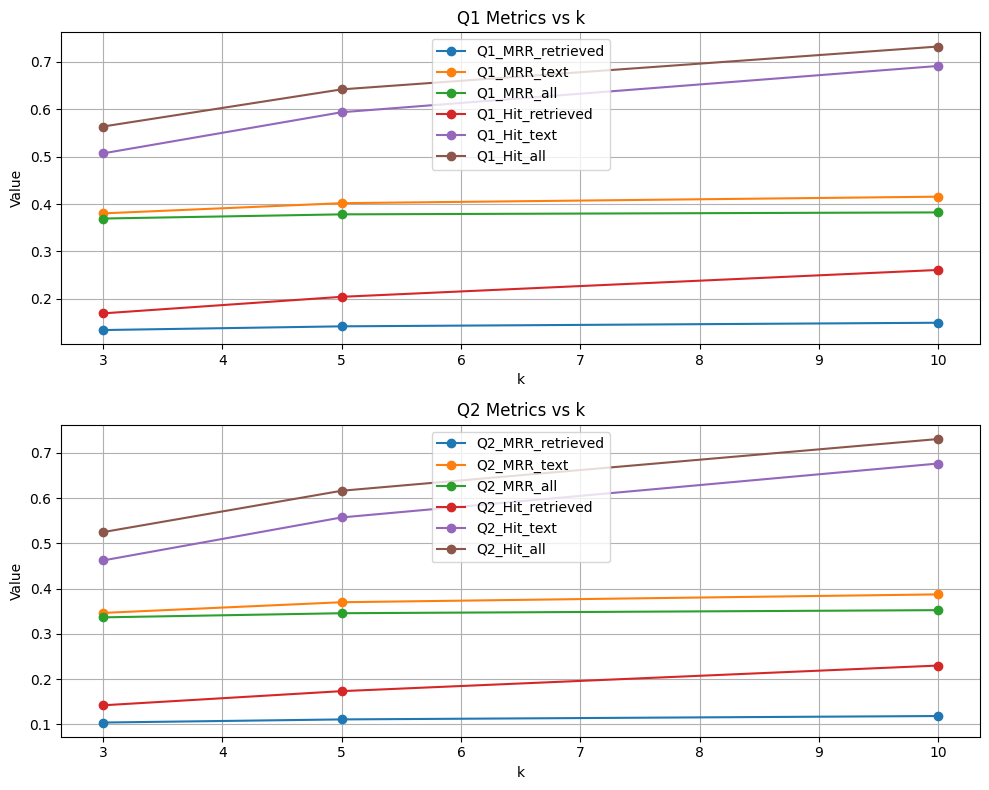

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the three different k values
k_values = [3, 5, 10]

# Q1 and Q2 metrics for each k
Q1_MRR_retrieved = [0.1345768150822302, 0.14239871640593663, 0.14995033713445266]
Q1_MRR_text = [0.3802647412755716, 0.4017448856799037, 0.4154207972800031]
Q1_MRR_all = [0.3693943040513438, 0.3782075525757836, 0.38229750345729263]
Q1_Hit_retrieved = [0.16967509025270758, 0.2045728038507822, 0.2611311672683514]
Q1_Hit_text = [0.50661853188929, 0.5932611311672683, 0.690734055354994]
Q1_Hit_all = [0.5631768953068592, 0.641395908543923, 0.7316486161251504]

Q2_MRR_retrieved = [0.1038908945046129, 0.11081026875250702, 0.11829981089908886]
Q2_MRR_text = [0.34616927396710784, 0.36975531488166863, 0.3871005482016312]
Q2_MRR_all = [0.33634175691937424, 0.3454792466525319, 0.3522600533819253]
Q2_Hit_retrieved = [0.14199759326113118, 0.17328519855595667, 0.22984356197352587]
Q2_Hit_text = [0.4620938628158845, 0.5571600481347774, 0.6762936221419976]
Q2_Hit_all = [0.5246690734055355, 0.6161251504211793, 0.7304452466907341]

# Plotting
plt.figure(figsize=(10, 8))

# Subplot for Q1 metrics
plt.subplot(2, 1, 1)
plt.plot(k_values, Q1_MRR_retrieved, label="Q1_MRR_retrieved", marker='o')
plt.plot(k_values, Q1_MRR_text, label="Q1_MRR_text", marker='o')
plt.plot(k_values, Q1_MRR_all, label="Q1_MRR_all", marker='o')
plt.plot(k_values, Q1_Hit_retrieved, label="Q1_Hit_retrieved", marker='o')
plt.plot(k_values, Q1_Hit_text, label="Q1_Hit_text", marker='o')
plt.plot(k_values, Q1_Hit_all, label="Q1_Hit_all", marker='o')
plt.title('Q1 Metrics vs k')
plt.xlabel('k')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Subplot for Q2 metrics
plt.subplot(2, 1, 2)
plt.plot(k_values, Q2_MRR_retrieved, label="Q2_MRR_retrieved", marker='o')
plt.plot(k_values, Q2_MRR_text, label="Q2_MRR_text", marker='o')
plt.plot(k_values, Q2_MRR_all, label="Q2_MRR_all", marker='o')
plt.plot(k_values, Q2_Hit_retrieved, label="Q2_Hit_retrieved", marker='o')
plt.plot(k_values, Q2_Hit_text, label="Q2_Hit_text", marker='o')
plt.plot(k_values, Q2_Hit_all, label="Q2_Hit_all", marker='o')
plt.title('Q2 Metrics vs k')
plt.xlabel('k')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [82]:
df_Q2

,Q2_retrieved_images,Q2_text_extracted_images,Q2_all_images,Q2_rr_retrieved,Q2_rr_text,Q2_rr_all,Q2_hit_retrieved,Q2_hit_text,Q2_hit_all
0,[e6f5d6901969cbd22e1706cabb272cdee3f5b7113de16...,[d98c7aa693cfe6c901e25f369dae3a9b9f965ea863d3b...,[d98c7aa693cfe6c901e25f369dae3a9b9f965ea863d3b...,0.000000,0.000000,0.000000,False,False,False
1,[015ed070e7cea04a302de4843b491c814dca280d0bff1...,[f779075295817cb4bd9d5cd71fac44ff72a841862e0a8...,[f779075295817cb4bd9d5cd71fac44ff72a841862e0a8...,0.000000,0.000000,0.000000,False,False,False
2,[db0fc016793fd250d354e55f28c0ff755a7562ddb01d7...,[ee3c550f55bdc7e3f663c2ad69b05a85fa9953e5bc03e...,[ee3c550f55bdc7e3f663c2ad69b05a85fa9953e5bc03e...,0.333333,0.333333,0.200000,True,True,True
3,[5b1768f9177a893f6ebb0fa608a397b00885a761ee4b7...,[e57d53eba4d4e766b8a6262dce1487b77e23f717871aa...,[e57d53eba4d4e766b8a6262dce1487b77e23f717871aa...,0.000000,0.500000,0.166667,False,True,True
4,[32ebb7f9abf7dbf2f4308c98921ad7438f1b113575e59...,[f10652d9e4f282bff0bd73b2f414bd0a43616a719ea2d...,[f10652d9e4f282bff0bd73b2f414bd0a43616a719ea2d...,0.000000,0.000000,0.000000,False,False,False
